<a href="https://colab.research.google.com/github/DukeAche/DukeAche/blob/main/Mushroom_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Importing libraries

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(15,15))
sns.set_style('darkgrid')
pd.set_option('display.max_columns',0)
pd.set_option('display.max_rows',100)
%matplotlib inline

<Figure size 1500x1500 with 0 Axes>

#Loading the dataset

In [ ]:
dfmushroom = pd.read_csv('/content/sample_data/mushrooms.csv')


#

In [ ]:
dfmushroom

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,1,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,0,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,1,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,0,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,0,3,2,4,0,5,0,0,0,11,0,0,2,2,5,5,1,1,4,0,1,2
8120,0,5,2,4,0,5,0,0,0,11,0,0,2,2,5,5,0,1,4,0,4,2
8121,0,2,2,4,0,5,0,0,0,5,0,0,2,2,5,5,1,1,4,0,1,2
8122,1,3,3,4,0,8,1,0,1,0,1,0,2,1,7,7,2,1,0,7,4,2


from matplotlib import pyplot as plt
dfmushroom['class'].plot(kind='hist', bins=20, title='class')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['cap-shape'].plot(kind='hist', bins=20, title='cap-shape')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['cap-surface'].plot(kind='hist', bins=20, title='cap-surface')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['cap-color'].plot(kind='hist', bins=20, title='cap-color')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom.plot(kind='scatter', x='class', y='cap-shape', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom.plot(kind='scatter', x='cap-shape', y='cap-surface', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom.plot(kind='scatter', x='cap-surface', y='cap-color', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom.plot(kind='scatter', x='cap-color', y='bruises', s=32, alpha=.8)
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['class'].plot(kind='line', figsize=(8, 4), title='class')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['cap-shape'].plot(kind='line', figsize=(8, 4), title='cap-shape')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['cap-surface'].plot(kind='line', figsize=(8, 4), title='cap-surface')
plt.gca().spines[['top', 'right']].set_visible(False)

from matplotlib import pyplot as plt
dfmushroom['cap-color'].plot(kind='line', figsize=(8, 4), title='cap-color')
plt.gca().spines[['top', 'right']].set_visible(False)

In [ ]:
dfmushroom.head() #View first five rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,e,e,s,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,e,c,s,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,e,c,s,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,e,e,s,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,t,e,s,s,w,w,p,w,o,e,n,a,g


In [ ]:
dfmushroom.tail()#View first five rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
8119,e,k,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,e,?,s,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
8123,e,x,s,n,f,n,a,c,b,y,e,?,s,s,o,o,p,o,o,p,o,c,l


In [ ]:
dfmushroom.sample(10)#View 10 random rows

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
3301,e,f,f,e,t,n,f,c,b,w,t,b,s,s,p,w,p,w,o,p,n,y,d
4582,p,x,y,g,f,f,f,c,b,p,e,b,k,k,b,n,p,w,o,l,h,y,p
4456,p,f,f,g,f,f,f,c,b,g,e,b,k,k,n,b,p,w,o,l,h,y,p
1770,e,x,s,g,f,n,f,w,b,k,t,e,f,f,w,w,p,w,o,e,k,a,g
4597,p,f,f,y,f,f,f,c,b,g,e,b,k,k,b,b,p,w,o,l,h,y,d
3633,p,x,f,g,f,f,f,c,b,h,e,b,k,k,b,p,p,w,o,l,h,v,g
2858,e,f,f,g,t,n,f,c,b,p,t,b,s,s,g,w,p,w,o,p,k,y,d
5160,p,x,y,n,f,f,f,c,n,b,t,?,s,k,w,w,p,w,o,e,w,v,l
7070,p,k,s,n,f,s,f,c,n,b,t,?,s,k,p,w,p,w,o,e,w,v,p
3338,e,f,y,n,t,n,f,c,b,n,t,b,s,s,p,g,p,w,o,p,n,y,d


#

#Data Exploration

In [ ]:
dfmushroom.describe().T.style.background_gradient(axis=0)  #Statistical summary

,count,unique,top,freq
class,8124,2,e,4208
cap-shape,8124,6,x,3656
cap-surface,8124,4,y,3244
cap-color,8124,10,n,2284
bruises,8124,2,f,4748
odor,8124,9,n,3528
gill-attachment,8124,2,f,7914
gill-spacing,8124,2,c,6812
gill-size,8124,2,b,5612
gill-color,8124,12,b,1728


In [ ]:
dfmushroom.info()  #view the data infomation about the data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

In [ ]:
dfmushroom.dtypes #view the data types

class                       object
cap-shape                   object
cap-surface                 object
cap-color                   object
bruises                     object
odor                        object
gill-attachment             object
gill-spacing                object
gill-size                   object
gill-color                  object
stalk-shape                 object
stalk-root                  object
stalk-surface-above-ring    object
stalk-surface-below-ring    object
stalk-color-above-ring      object
stalk-color-below-ring      object
veil-type                   object
veil-color                  object
ring-number                 object
ring-type                   object
spore-print-color           object
population                  object
habitat                     object
dtype: object

In [ ]:
dfmushroom.describe()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
count,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124,8124
unique,2,6,4,10,2,9,2,2,2,12,2,5,4,4,9,9,1,4,3,5,9,6,7
top,e,x,y,n,f,n,f,c,b,b,t,b,s,s,w,w,p,w,o,p,w,v,d
freq,4208,3656,3244,2284,4748,3528,7914,6812,5612,1728,4608,3776,5176,4936,4464,4384,8124,7924,7488,3968,2388,4040,3148


from matplotlib import pyplot as plt
import seaborn as sns
_df_0.groupby('class').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_1.groupby('cap-shape').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_2.groupby('cap-surface').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
_df_3.groupby('cap-color').size().plot(kind='barh', color=sns.palettes.mpl_palette('Dark2'))
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cap-shape'].value_counts()
    for x_label, grp in _df_4.groupby('class')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('class')
_ = plt.ylabel('cap-shape')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cap-surface'].value_counts()
    for x_label, grp in _df_5.groupby('cap-shape')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cap-shape')
_ = plt.ylabel('cap-surface')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['cap-color'].value_counts()
    for x_label, grp in _df_6.groupby('cap-surface')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cap-surface')
_ = plt.ylabel('cap-color')

from matplotlib import pyplot as plt
import seaborn as sns
import pandas as pd
plt.subplots(figsize=(8, 8))
df_2dhist = pd.DataFrame({
    x_label: grp['bruises'].value_counts()
    for x_label, grp in _df_7.groupby('cap-color')
})
sns.heatmap(df_2dhist, cmap='viridis')
plt.xlabel('cap-color')
_ = plt.ylabel('bruises')

In [ ]:
for i in dfmushroom.columns:
    dfmushroom[i] = dfmushroom[i].astype('category')
    print(dfmushroom[i].value_counts())
    print('='*50)

e    4208
p    3916
Name: class, dtype: int64
x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64
y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64
n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64
f    4748
t    3376
Name: bruises, dtype: int64
n    3528
f    2160
s     576
y     576
a     400
l     400
p     256
c     192
m      36
Name: odor, dtype: int64
f    7914
a     210
Name: gill-attachment, dtype: int64
c    6812
w    1312
Name: gill-spacing, dtype: int64
b    5612
n    2512
Name: gill-size, dtype: int64
b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64
t    4608
e    3516
Name: stalk-shape, dtype: int64
b    3776
?    2480
e    1120
c     556
r     192
Name: stalk-root, dtype: int64
s    5176
k    2372
f     552
y      24
Name: stalk-surf

In [ ]:
dfmushroom.isnull().sum() #Looking for missing values

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [ ]:
dfmushroom.shape

(8124, 22)

In [ ]:
dfmushroom.drop(columns='veil-type', inplace=True)
dfmushroom.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 22 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   class                     8124 non-null   category
 1   cap-shape                 8124 non-null   category
 2   cap-surface               8124 non-null   category
 3   cap-color                 8124 non-null   category
 4   bruises                   8124 non-null   category
 5   odor                      8124 non-null   category
 6   gill-attachment           8124 non-null   category
 7   gill-spacing              8124 non-null   category
 8   gill-size                 8124 non-null   category
 9   gill-color                8124 non-null   category
 10  stalk-shape               8124 non-null   category
 11  stalk-root                8124 non-null   category
 12  stalk-surface-above-ring  8124 non-null   category
 13  stalk-surface-below-ring  8124 non-null   catego



*   it seems all data are complete and there is no null values in any of 8124 record

*   but all data looks like categorical data.



#Data visualization

In [ ]:
labels = ['Edible', 'Poisonous']
values = [dfmushroom.describe()['class']['freq'], dfmushroom.describe()['class']['count']-dfmushroom.describe()['class']['freq']]
colors = ['green', 'red']

fig = go.Figure(data=[go.Pie(labels=labels, values=values, opacity=0.8)])
fig.update_traces(textinfo='percent+label', marker=dict(line=dict(color='#000000', width=2), colors=colors))
fig.update_layout(title_text='Distribution of the Mushrooms by their Classes', title_x=0.5, title_font=dict(size=28))
fig.show()

The dataset is almost balanced

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.metrics import classification_report
from sklearn.preprocessing import OrdinalEncoder
import seaborn as sns
import plotly.graph_objects as go
from xgboost import XGBClassifier

from sklearn import svm
import plotly.figure_factory as ff
import warnings
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
from sklearn.model_selection import train_test_split
import numpy as np
import plotly.express as px
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
warnings.filterwarnings('ignore')

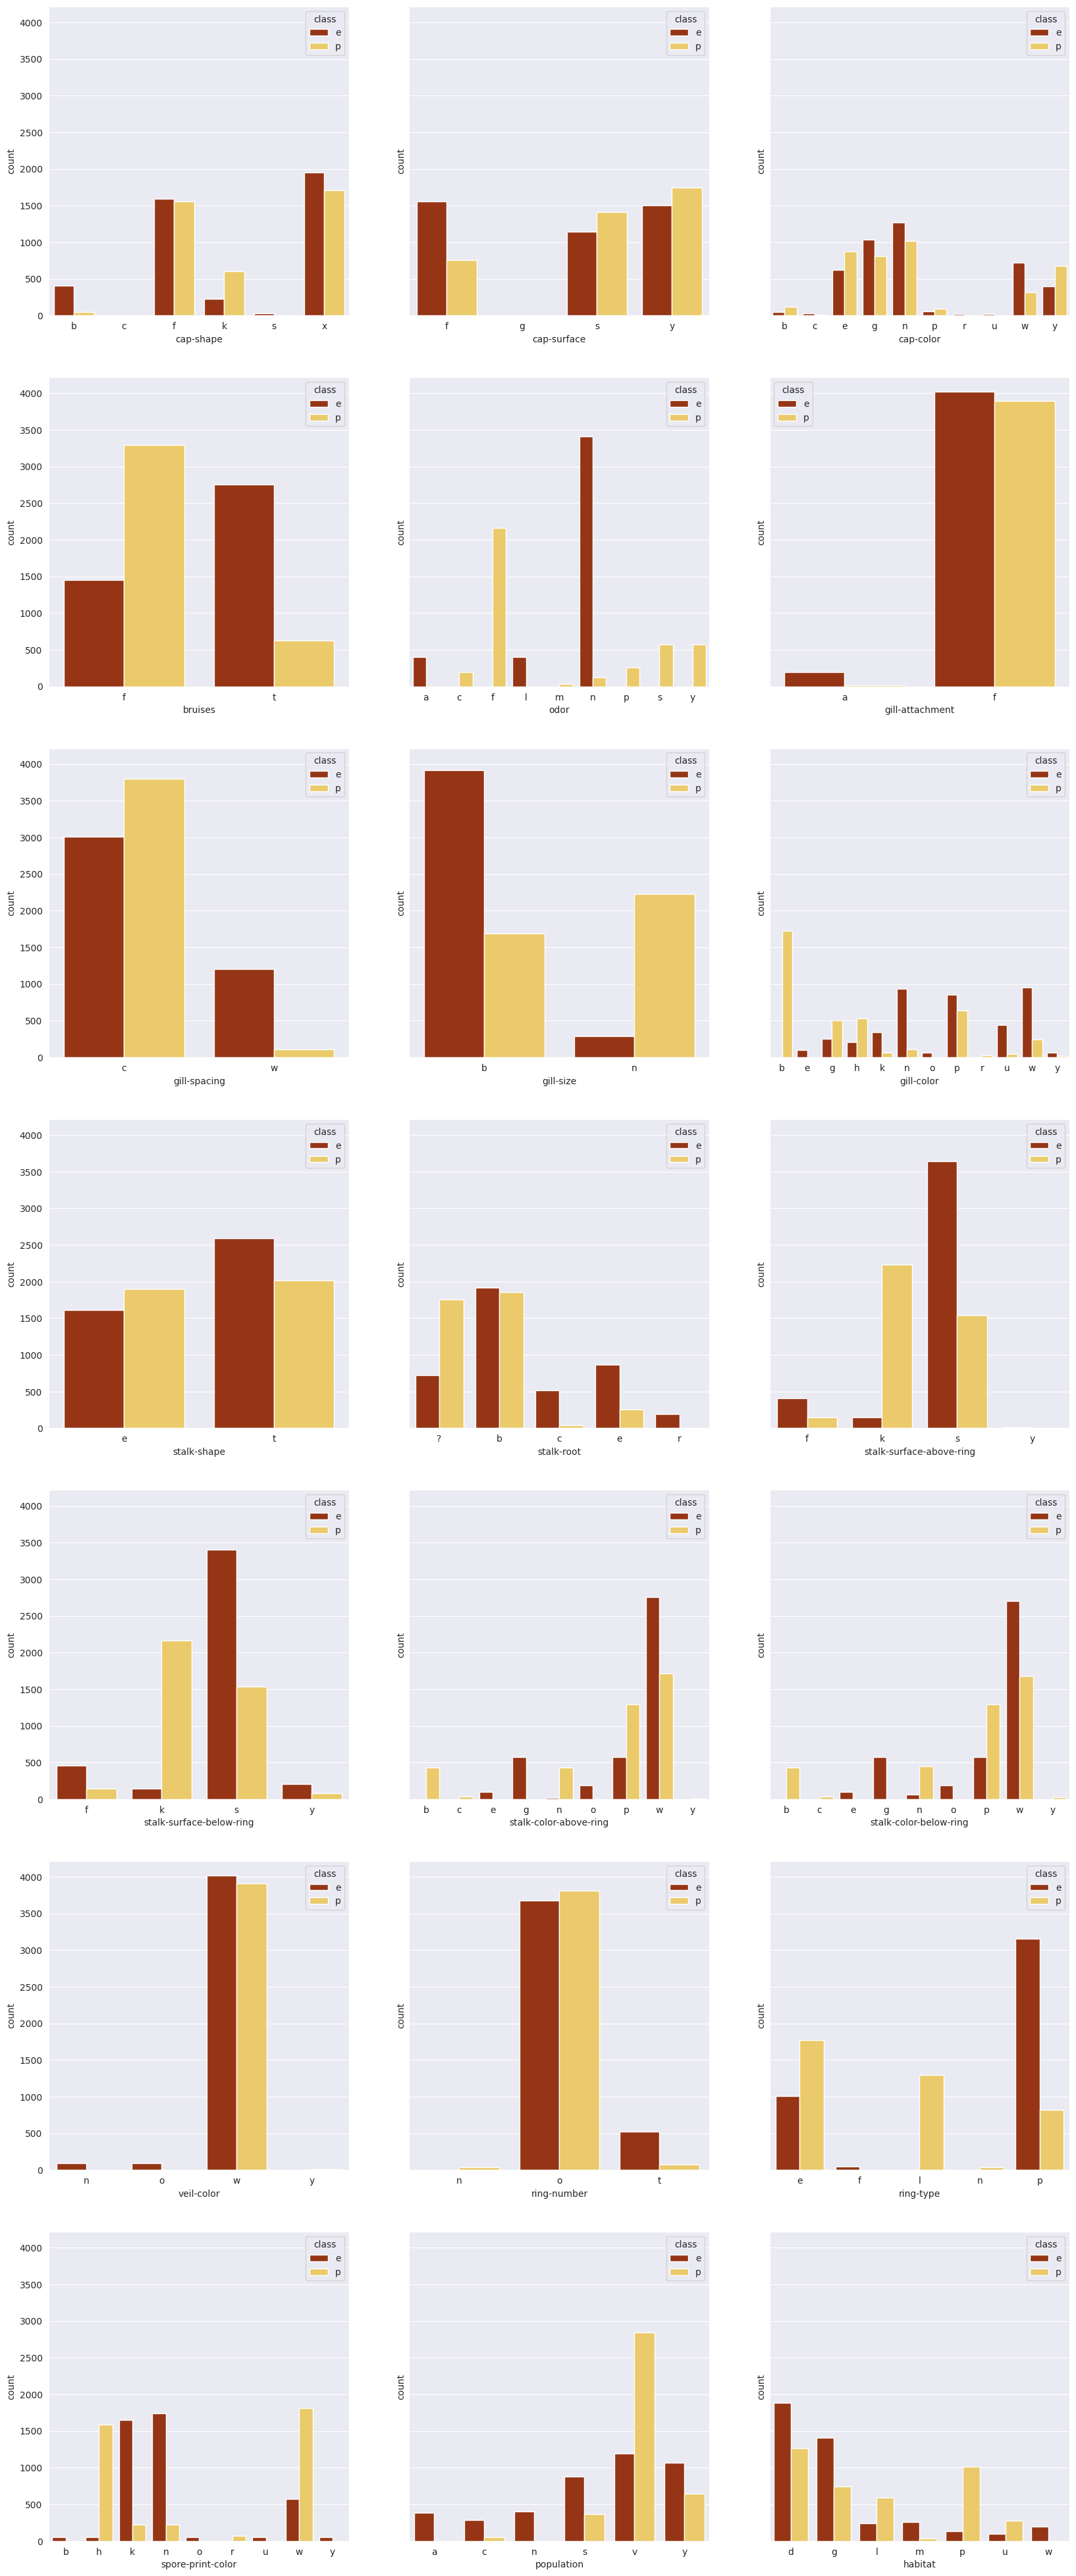

In [ ]:
fig, axes = plt.subplots(nrows=7,ncols=3, figsize=(20,50),sharey=True)
idx = 0
for col in dfmushroom.columns[1:]:
    sns.countplot(data=dfmushroom,x=col, hue='class' ,ax=axes[idx//3][idx%3], palette='afmhot')
    idx += 1

#Data Preprocessing

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder() #changing the string values into numerical
for col in dfmushroom.columns:
    dfmushroom = dfmushroom.apply(le.fit_transform)

In [ ]:
dfX = dfmushroom.iloc[:,1:]
dfY = dfmushroom['class']
dfX.head(5)

,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,stalk-shape,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,5,2,4,1,6,1,0,1,4,0,3,2,2,7,7,2,1,4,2,3,5
1,5,2,9,1,0,1,0,0,4,0,2,2,2,7,7,2,1,4,3,2,1
2,0,2,8,1,3,1,0,0,5,0,2,2,2,7,7,2,1,4,3,2,3
3,5,3,8,1,6,1,0,1,5,0,3,2,2,7,7,2,1,4,2,3,5
4,5,2,3,0,5,1,1,0,4,1,3,2,2,7,7,2,1,0,3,0,1


In [ ]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.model_selection import KFold  #KFold
skf = KFold(n_splits=5, shuffle=True)

In [ ]:
accuracy_report = dict()
def trainwith(modelname):
    print(f'using model: {modelname} '.center(100,'='),'\n')
    idx = 0
    model_accuracy =[]
    for _train,_test in skf.split(dfX, dfY):
        idx += 1
        print(f'Fold Number {idx} '.center(100,'='), '\n')
        modelname.fit(dfX.iloc[_train],dfY.iloc[_train])
        print('Confusion Matrix'.center(70,'-'), '\n')
        ypred = modelname.predict(dfX.iloc[_test])
        sns.heatmap(confusion_matrix(dfY.iloc[_test],ypred), annot=True, fmt='d', cmap='Greens',cbar=False)
        plt.show()
        print('Classification Report'.center(70,'-'), '\n')
        print(classification_report(dfY.iloc[_test],ypred))
        model_accuracy.append(accuracy_score(dfY.iloc[_test],ypred))
    print('='*100)
    print('The average accuracy of this model is {:.02f}%'.format(np.array(model_accuracy).mean()*100))
    accuracy_report[str(modelname)] = round(np.array(model_accuracy).mean()*100,2)

#Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier

#Logistic Regression

==========================using model: LogisticRegression(max_iter=1000) =========================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



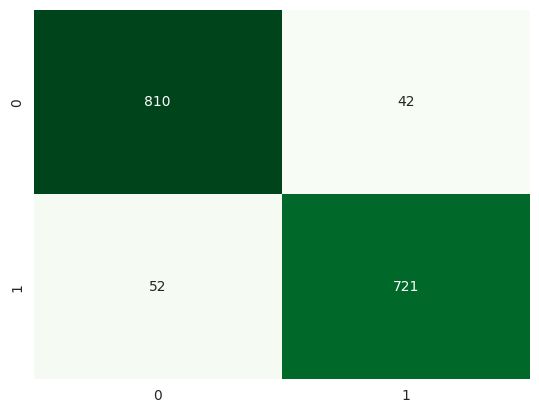

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.95      0.95       852
           1       0.94      0.93      0.94       773

    accuracy                           0.94      1625
   macro avg       0.94      0.94      0.94      1625
weighted avg       0.94      0.94      0.94      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



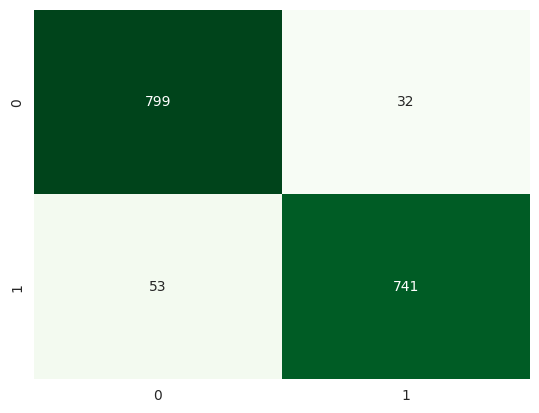

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       831
           1       0.96      0.93      0.95       794

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



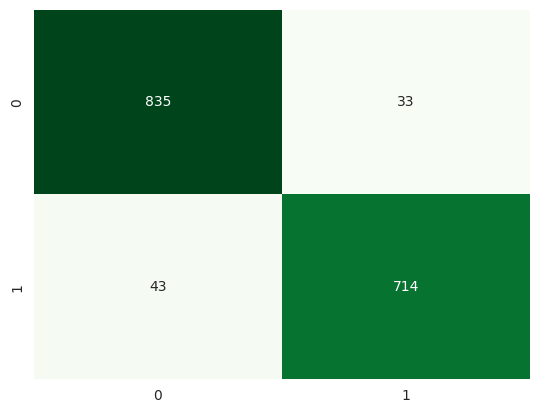

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.96      0.96       868
           1       0.96      0.94      0.95       757

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



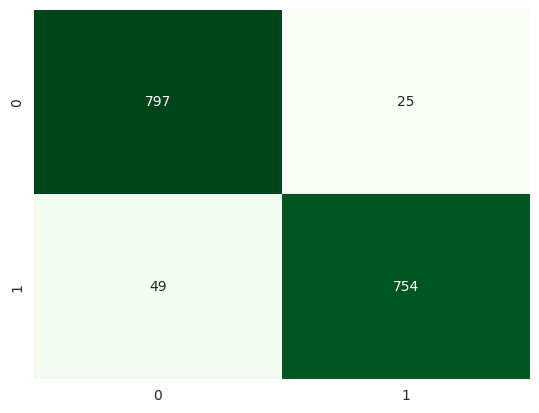

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.94      0.97      0.96       822
           1       0.97      0.94      0.95       803

    accuracy                           0.95      1625
   macro avg       0.95      0.95      0.95      1625
weighted avg       0.95      0.95      0.95      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



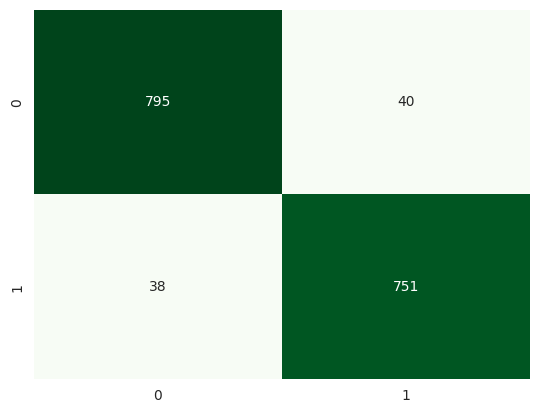

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.95      0.95      0.95       835
           1       0.95      0.95      0.95       789

    accuracy                           0.95      1624
   macro avg       0.95      0.95      0.95      1624
weighted avg       0.95      0.95      0.95      1624

The average accuracy of this model is 94.99%


In [ ]:
logReg = LogisticRegression(max_iter=1000)
trainwith(logReg)

#SVC

========================================using model: SVC() ========================================= 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



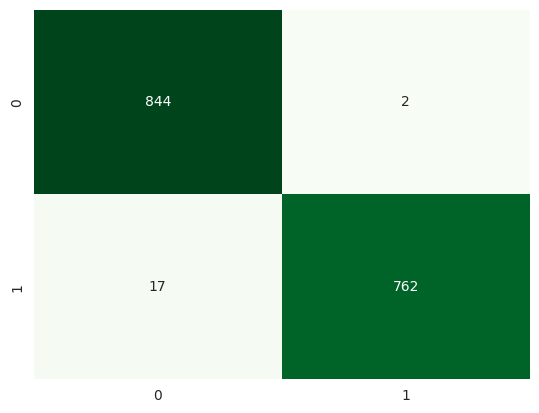

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       846
           1       1.00      0.98      0.99       779

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



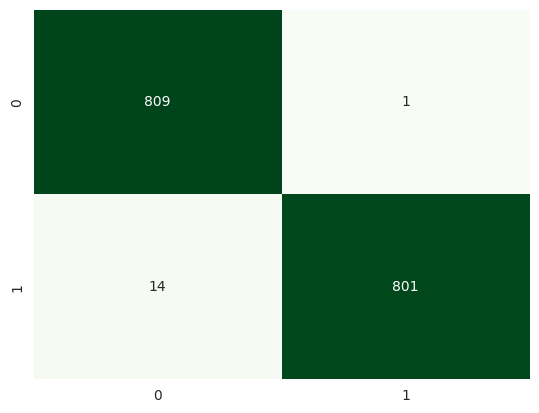

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       810
           1       1.00      0.98      0.99       815

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



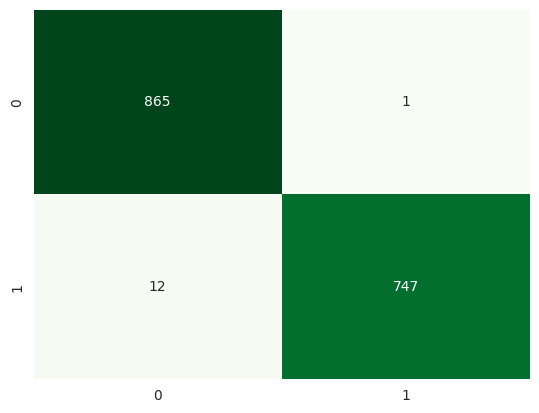

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.99      1.00      0.99       866
           1       1.00      0.98      0.99       759

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



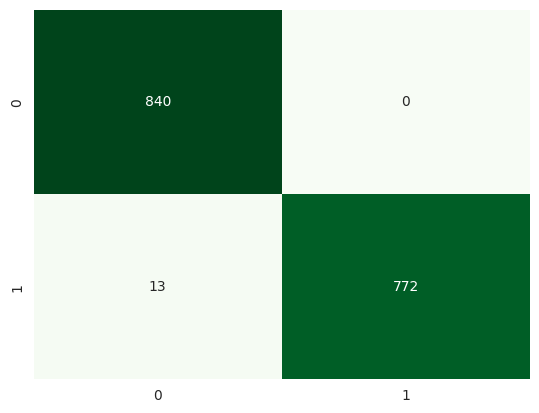

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       840
           1       1.00      0.98      0.99       785

    accuracy                           0.99      1625
   macro avg       0.99      0.99      0.99      1625
weighted avg       0.99      0.99      0.99      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



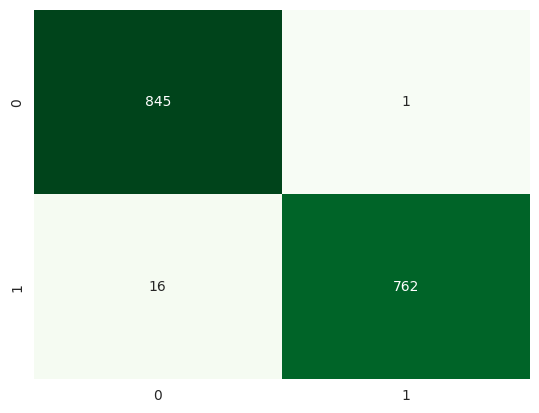

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       846
           1       1.00      0.98      0.99       778

    accuracy                           0.99      1624
   macro avg       0.99      0.99      0.99      1624
weighted avg       0.99      0.99      0.99      1624

The average accuracy of this model is 99.05%


In [ ]:
svc_model = SVC()
trainwith(svc_model)

#KNN

================================using model: KNeighborsClassifier() ================================ 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



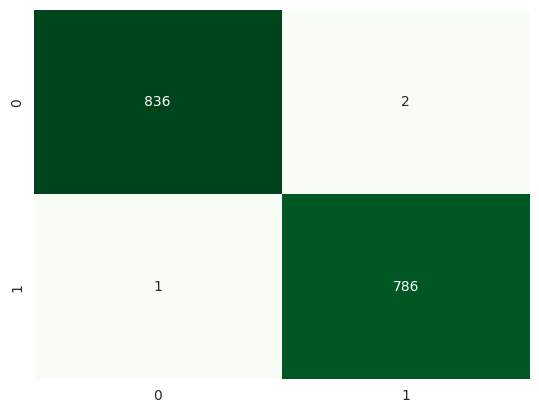

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       787

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



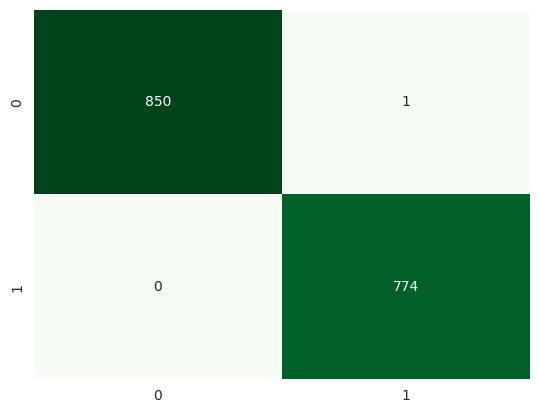

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



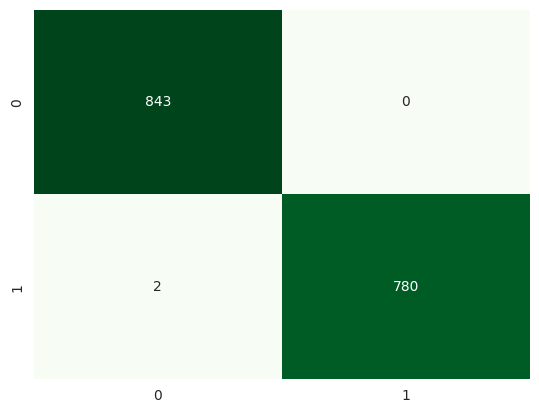

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       843
           1       1.00      1.00      1.00       782

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



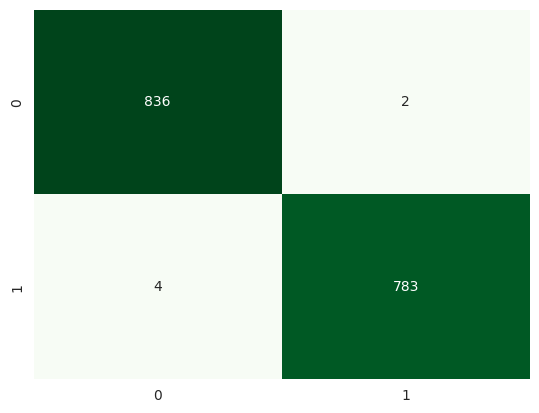

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      0.99      1.00       787

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



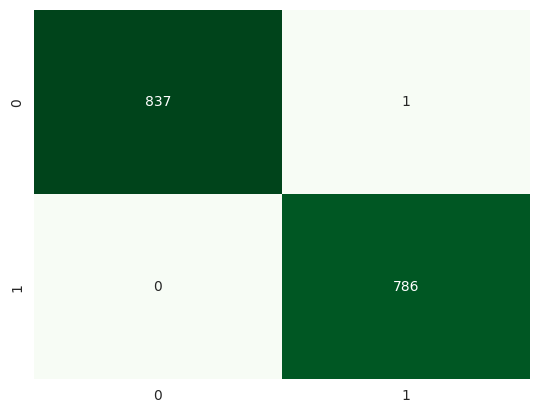

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       838
           1       1.00      1.00      1.00       786

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accuracy of this model is 99.84%


In [ ]:
knn_model = KNeighborsClassifier()
trainwith(knn_model)

#Decision Tree

===============================using model: DecisionTreeClassifier() =============================== 

===========================================Fold Number 1 =========================================== 

---------------------------Confusion Matrix--------------------------- 



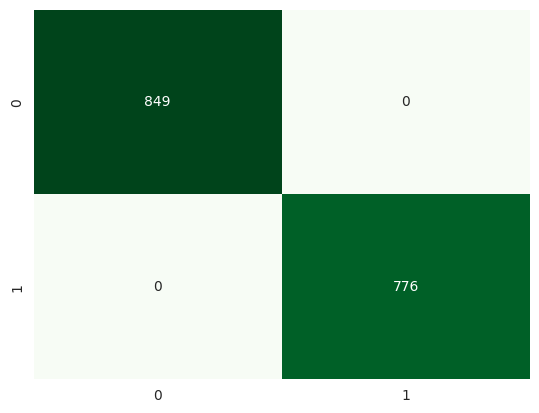

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       849
           1       1.00      1.00      1.00       776

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 2 =========================================== 

---------------------------Confusion Matrix--------------------------- 



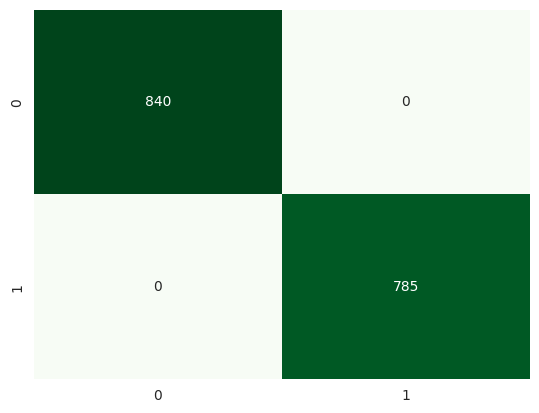

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       840
           1       1.00      1.00      1.00       785

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 3 =========================================== 

---------------------------Confusion Matrix--------------------------- 



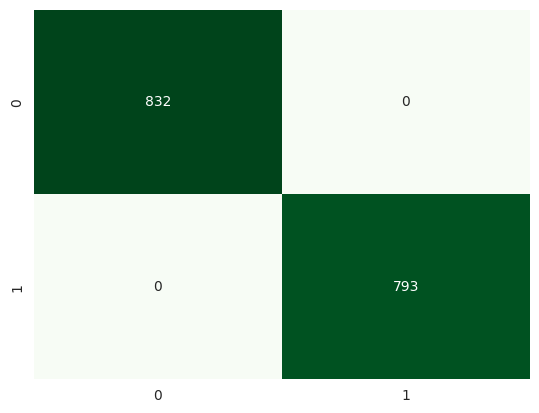

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       832
           1       1.00      1.00      1.00       793

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 4 =========================================== 

---------------------------Confusion Matrix--------------------------- 



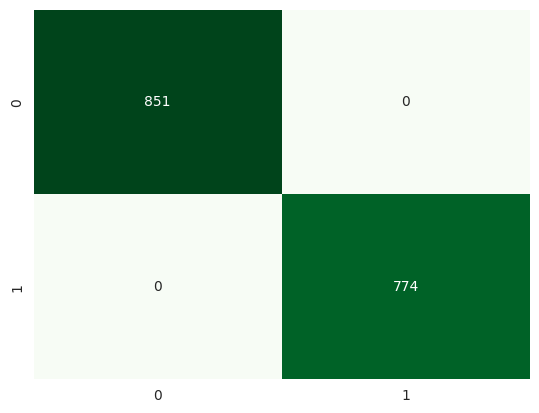

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       851
           1       1.00      1.00      1.00       774

    accuracy                           1.00      1625
   macro avg       1.00      1.00      1.00      1625
weighted avg       1.00      1.00      1.00      1625

===========================================Fold Number 5 =========================================== 

---------------------------Confusion Matrix--------------------------- 



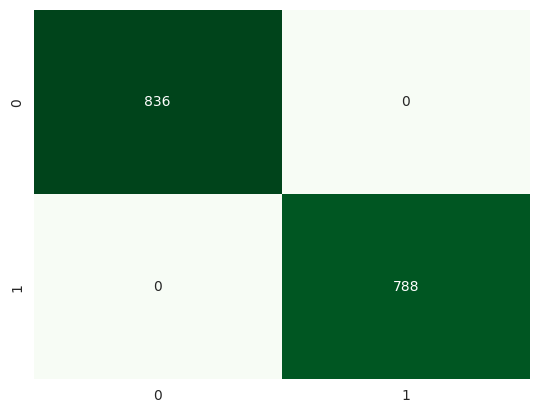

------------------------Classification Report------------------------- 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       836
           1       1.00      1.00      1.00       788

    accuracy                           1.00      1624
   macro avg       1.00      1.00      1.00      1624
weighted avg       1.00      1.00      1.00      1624

The average accuracy of this model is 100.00%


In [ ]:
dt_model = DecisionTreeClassifier()
trainwith(dt_model)

#Conclusion

In [ ]:
accuracy_report

{'LogisticRegression(max_iter=1000)': 94.99,
 'SVC()': 99.05,
 'KNeighborsClassifier()': 99.84,
 'DecisionTreeClassifier()': 100.0}

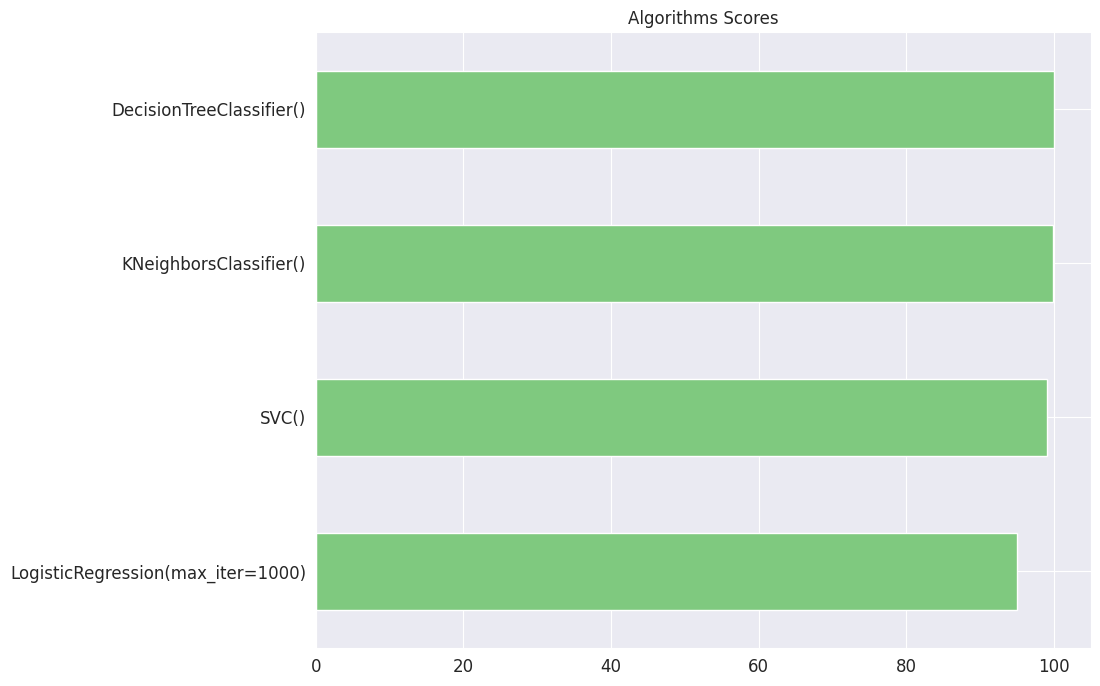

In [ ]:
pd.Series(accuracy_report).plot(kind='barh', title='Algorithms Scores', colormap ='Accent', figsize=(10,8), fontsize=12)
plt.show()

**The Decision tree has the best accuracy with 100%. So use DecisionTreeClassifier to classify any new Mushroom class**